In [16]:
import base64
import datetime
import hashlib
import hmac
import json
import urllib
import urllib.parse
import urllib.request
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from HuobiDMService import HuobiDM
from pprint import pprint
import os
import abupy
import datetime

ACCESS_KEY = "********************"
SECRET_KEY = "***********************"


# API 请求地址
URL="https://api.hbdm.com"
dm = HuobiDM(URL, ACCESS_KEY, SECRET_KEY)
#print (u' 获取K线数据 ')
#pprint （dm.get_contract_kline(symbol='EOS_CQ', period='15min', size=200))

def getDataFrame(symbolstr):  
    resp=dm.get_contract_kline(symbol=symbolstr, period='15min', size=200)
    r2=json.dumps(resp)
    loaded_r2 = json.loads(r2)
    df=pd.DataFrame(loaded_r2['data'])#现货
    df=df.sort_values(by=['id']).reset_index(drop=True)
    eos_sma20=df['close'].rolling(15).mean()
    df['sma20']=eos_sma20
    df['tmp']=df['close'].rolling(15).std()
    df['boll-top']=df['sma20']+2*df['tmp']
    df['boll-low']=df['sma20']-2*df['tmp']
    plt.plot(df['close'],'y')
    plt.plot(df['sma20'],'b--')
    plt.plot(df['boll-top'],'r')
    plt.plot(df['boll-low'],'r')
    plt.legend()
    plt.show()
    return df

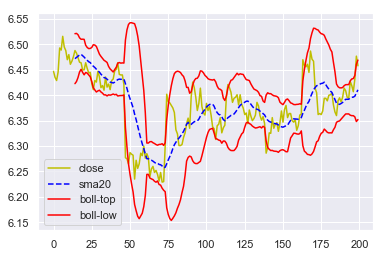

,amount,close,count,high,id,low,open,vol,sma20,tmp,boll-top,boll-low
0,2.9807e+05,6.447,690,6.464,1560204900,6.436,6.457,192290,NaN,NaN,NaN,NaN
1,4.7575e+05,6.435,922,6.446,1560205800,6.414,6.446,305876,NaN,NaN,NaN,NaN
2,2.5626e+05,6.429,675,6.455,1560206700,6.423,6.435,164994,NaN,NaN,NaN,NaN
3,2.7726e+05,6.446,638,6.448,1560207600,6.425,6.426,178426,NaN,NaN,NaN,NaN
4,8.5327e+05,6.493,1848,6.520,1560208500,6.444,6.445,552904,NaN,NaN,NaN,NaN
5,6.3309e+05,6.489,1212,6.507,1560209400,6.476,6.493,410930,NaN,NaN,NaN,NaN
6,1.1228e+06,6.516,2154,6.544,1560210300,6.470,6.489,730662,NaN,NaN,NaN,NaN
7,2.0352e+06,6.495,3761,6.570,1560211200,6.489,6.515,1328898,NaN,NaN,NaN,NaN
8,9.9579e+05,6.488,1968,6.504,1560212100,6.455,6.497,645678,NaN,NaN,NaN,NaN
9,4.4338e+05,6.470,888,6.500,1560213000,6.470,6.489,287578,NaN,NaN,NaN,NaN


In [17]:
getDataFrame('EOS_CQ')